In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_df = pd.read_csv("D:\Data Science\Datasets\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data/German Credit Data.csv")

In [3]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
credit_df.iloc[0:5, 1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [6]:
credit_df.iloc[0:5, 7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [7]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [8]:
credit_df['status'].value_counts()

0    700
1    300
Name: status, dtype: int64

In [9]:
X_features = list(credit_df.columns)

In [10]:
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [11]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True)

In [12]:
list(encoded_credit_df)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [13]:
encoded_credit_df[['checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14']].head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [14]:
import statsmodels.api as sm

y = credit_df.status

X = sm.add_constant(encoded_credit_df)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)

In [16]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [17]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2021-06-26 18:47  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

In [18]:
## Checking which features have p-value less than 0.05

In [19]:
def get_significant_vars(lm):
    #Stores the p-values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    #filter the column names where p-values is less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [20]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [21]:
final_logit = sm.Logit(y_train,
                      sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [22]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2021-06-26 18:47 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

In [23]:
y_pred_df = pd.DataFrame({"actual": y_test,
                          "predicted_prob": final_logit.predict(
                          sm.add_constant(X_test[significant_vars]))})

In [24]:
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [25]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

In [26]:
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
## Confusion Matrix

In [29]:
from sklearn import metrics

In [30]:
def draw_cm( actual, predicted ): 
 ## Create
 cm = metrics.confusion_matrix( actual, predicted, [1,0] ) 
 sns.heatmap(cm, annot=True, fmt='.2f', 
xticklabels = ["Bad credit", "Good Credit"] , 
yticklabels = ["Bad credit", "Good Credit"] ) 
 plt.ylabel('True label') 
 plt.xlabel('Predicted label') 
 plt.show() 

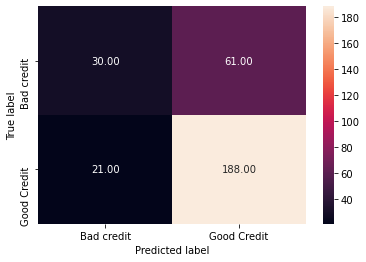

In [31]:
draw_cm( y_pred_df.actual, 
y_pred_df.predicted ) 

In [32]:
print(metrics.classification_report(y_pred_df.actual,
                                   y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



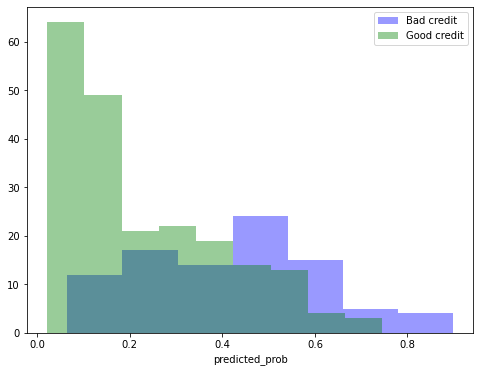

In [33]:
plt.figure(figsize=(8,6))
#Plotting distribution of predicted probability values for bad credits

sns.distplot(y_pred_df[y_pred_df.actual == 1]['predicted_prob'],
             kde=False, color='b',
             label = 'Bad credit')

sns.distplot(y_pred_df[y_pred_df.actual == 0]['predicted_prob'],
            kde = False, color = 'g',
            label = 'Good credit')
plt.legend()
plt.show()


In [34]:
def draw_roc(actual, probs):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve(actual,
                                  probs, 
                                  drop_intermediate=False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

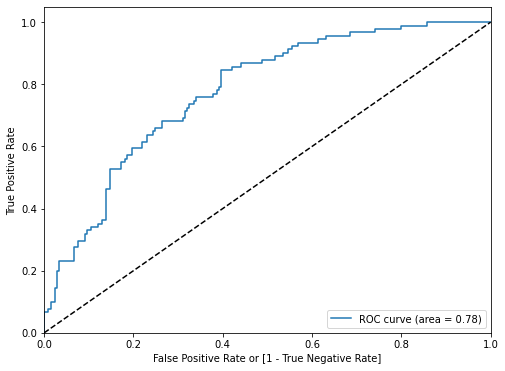

In [35]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual,
                               y_pred_df.predicted_prob)

In [36]:
auc_score = metrics.roc_auc_score(y_pred_df.actual,
                                 y_pred_df.predicted_prob)
round(float(auc_score), 2)

0.78

### Finding Optimal Classification Cut-off

### Youden's index

In [37]:
tpr_fpr = pd.DataFrame({'tpr':tpr,
                       'fpr':fpr,
                       'thresholds':thresholds})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending=False)[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [38]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.22 else 0)

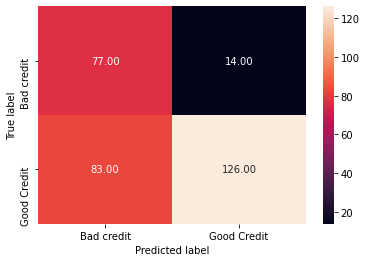

In [39]:
draw_cm(y_pred_df.actual,
       y_pred_df.predicted_new)

In [40]:
print(metrics.classification_report(y_pred_df.actual,
                                   y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



### Cost-Based Approach

In [41]:
def get_total_cost(actual, predicted, cost_FPs, cost_FNs):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    cm_mat = np.array(cm)
    return cm_mat[0,1]*cost_FNs+cm_mat[0,1]*cost_FPs

In [42]:
cost_df = pd.DataFrame(columns = ['prob', 'cost'])

In [43]:
idx = 0

# iterate cut-off probability values between 0.1 and 0.5

for each_prob in range(10, 50):
    cost = get_total_cost(y_pred_df.actual,
                         y_pred_df.predicted_prob.map(
                         lambda x: 1 if x > (each_prob/100) else 0), 1, 5)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [44]:
cost_df.sort_values('cost', ascending=True)[0:5]

,prob,cost
0,0.10,18.0
1,0.11,24.0
2,0.12,24.0
3,0.13,36.0
4,0.14,36.0


In [45]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.14 else 0)

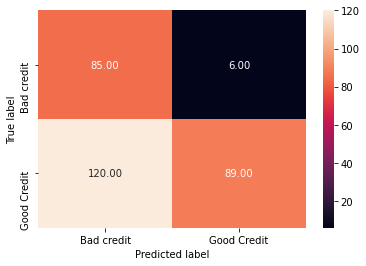

In [46]:
draw_cm(y_pred_df.actual,
       y_pred_df.predicted_using_cost)

### Gain Chart & Lift Chart

In [47]:
bank_df = pd.read_csv("D:\Data Science\Datasets\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data/bank.csv")

In [48]:
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [49]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [50]:
X_features = list(bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [51]:
encoded_bank_df = pd.get_dummies(bank_df[X_features],
                                drop_first=True)

In [52]:
y = bank_df.subscribed.map(lambda x: int(x == 'yes'))
X = encoded_bank_df

### Building the Logistic Regression Model

In [53]:
logit_model = sm.Logit(y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


In [54]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   subscribed       AIC:              3082.2384 
Date:                 2021-06-26 18:48 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [55]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [56]:
X_features = ['current-campaign',
'previous-campaign',
'job_retired',
'marital_married',
'education_tertiary',
'housing-loan_yes',
'personal-loan_yes']

In [57]:
logit_model_2 = sm.Logit( y, sm.add_constant( X[X_features] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


In [58]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.056     
Dependent Variable:   subscribed       AIC:              3065.2182 
Date:                 2021-06-26 18:48 BIC:              3116.5501 
No. Observations:     4521             Log-Likelihood:   -1524.6   
Df Model:             7                LL-Null:          -1615.5   
Df Residuals:         4513             LLR p-value:      8.1892e-36
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
current-campaign   -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous-campaign   0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing-loan_yes   -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
personal-loan_yes  -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

In [59]:
y_pred_df = pd.DataFrame( { 'actual': y,
'predicted_prob': logit_model_2.predict(
sm.add_constant( X[X_features] ) ) } )

In [60]:
sorted_predict_df = y_pred_df[['predicted_prob',
'actual']].sort_values( 'predicted_prob',
ascending = False )

In [61]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  452


In [62]:
def get_deciles( df ):
    df['decile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
        df['decile'] = df['decile'] + 1
        return df

In [63]:
deciles_predict_df = get_deciles( sorted_predict_df )

In [64]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


In [65]:
gain_lift_df = pd.DataFrame(
deciles_predict_df.groupby(
'decile')['actual'].sum() ).reset_index()
gain_lift_df.columns = ['decile', 'gain']

In [66]:
gain_lift_df['gain_percentage'] = (100 *
gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [67]:
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,396,100.000000


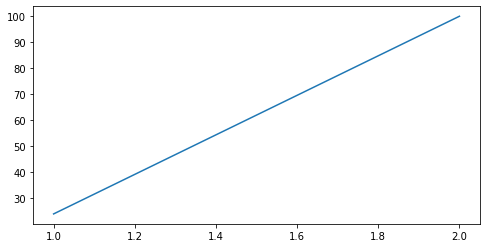

In [68]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'],
gain_lift_df['gain_percentage'], '-' )
plt.show()

### Calculating Lift

In [69]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage
/ ( gain_lift_df.decile * 10) )

In [70]:
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,396,100.000000,5.000000


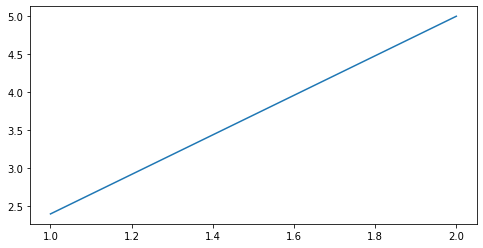

In [71]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'], gain_lift_df['lift'], '-' )
plt.show()

## Decision Trees

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing-loan', 'personal-loan', 'current-campaign',
       'previous-campaign', 'subscribed'],
      dtype='object')

In [74]:
y = credit_df.status

X = encoded_credit_df

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='gini',
                                 max_depth=3)

In [77]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Measuring Test Accuracy

In [78]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

0.5835743204164258

### Displaying the tree

In [80]:
gini_node_1 = 1 - pow(491/700, 2) - pow(209/700, 2)
print(round(gini_node_1, 4))

0.4189


### Building Decision Trees using Entropy Criteria

In [83]:
import math

entropy_node_1 = (491 / 700)*math.log2(491/700)-(209/700)*math.log2(209/700)
print(round(entropy_node_1, 2))

0.16


In [84]:
tree_predict = clf_tree_entropy.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

0.5763972869236027

In [85]:
### Find optimal criteria and max depth

In [86]:
from sklearn.model_selection import GridSearchCV


tuned_parameters = [{'criterion': ['gini', 'entropy'],
                    'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                  tuned_parameters,
                  cv=10,
                  scoring='roc_auc')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [87]:
clf.best_score_

0.6830090864917396

In [88]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [89]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion='gini',
                                  max_depth=4)

In [90]:
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [91]:
tree_model_predict = clf_model.predict(X_test)

In [92]:
metrics.roc_auc_score(y_test, tree_model_predict)

0.573742047426258